# ADRIAN MUSUNGU SHIKUKU 91375

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [67]:
data = pd.read_csv('iris.csv',names=['sepal length in cm','sepal width in cm ','petal length in cm','petal width in cm','class'])

In [68]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Adrian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


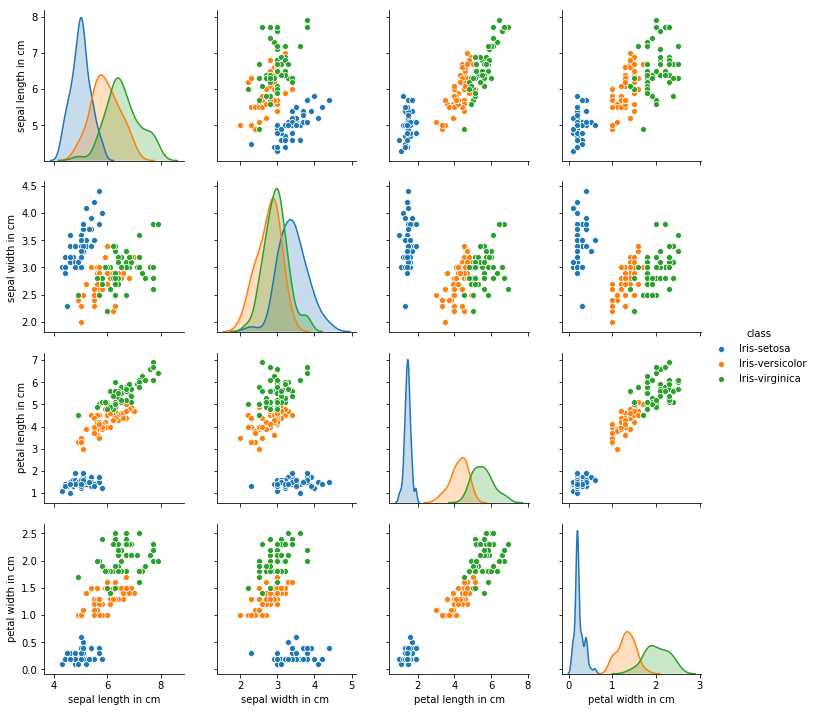

In [70]:
sns.pairplot(data,hue='class')

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(data.drop('class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
scaled_features = scaler.transform(data.drop('class',axis=1))

In [96]:
data_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_feat.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [76]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,data['class'],test_size=0.3,random_state=42)

In [106]:
y_train.shape

(105,)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Here, Path is linked to Decision Tree Graph

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))


In [ ]:
error_rate = []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Error rate against K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [ ]:
knn= KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred= knn.predict(X_test)

print('K AS 15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
knn.score(X_test,y_test)